In [1642]:
import pandas as pd
import numpy as np
import seaborn as sns
import platform
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

## 데이터 정리

In [1643]:
population = pd.read_csv('./data/성별, 연령별 인구 - 시군구(2019).csv',encoding='euc-kr')
population.fillna('', inplace=True)
population = population[population['시군구']!='소계']
population.columns

Index(['광역시도', '시군구', '행정구', '구분', '합계', '15세미만', '15~19세', '20~24세', '25~29세',
       '30~34세', '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세',
       '65~69세', '70~74세', '75~79세', '80~84세', '85세이상'],
      dtype='object')

In [1644]:
population['20~39세'] = population['20~24세'] + population['25~29세'] + population['30~34세'] + population['35~39세']
population['65세 이상'] = population['65~69세'] + population['70~74세'] + population['75~79세'] + population['80~84세'] + population['85세이상']
population.head()

,광역시도,시군구,행정구,구분,합계,15세미만,15~19세,20~24세,25~29세,30~34세,...,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,20~39세,65세 이상
3,서울,종로구,,계,136649,12204,5801,9816,11972,9459,...,11462,11781,10125,7057,5960,5277,3341,2065,40758,23700
4,서울,종로구,,남자,65594,6183,2803,4230,6167,4747,...,5511,5773,5021,3369,2659,2290,1387,747,19801,10452
5,서울,종로구,,여자,71055,6021,2998,5586,5805,4712,...,5951,6008,5104,3688,3301,2987,1954,1318,20957,13248
6,서울,중구,,계,115665,9839,3896,7511,10304,9636,...,9313,9786,9002,6211,5077,4201,2581,1695,37325,19765
7,서울,중구,,남자,55820,4988,1896,3103,5115,4790,...,4587,4830,4430,2998,2295,1795,1003,523,17998,8614


In [1645]:
population[population['시군구'] == ' 수원시']['시군구'][252]

' 수원시'

In [1646]:
pop = pd.pivot_table(population,
                    index=['광역시도','시군구','행정구'],
                    columns=['구분'],
                    values=['합계','20~39세','65세 이상'])

pop.head()
pop


20~39세                  65세 이상                    합계          \
구분                   계      남자      여자       계     남자     여자       계      남자   
광역시도 시군구  행정구                                                                  
강원    강릉시        46008   25015   20993   40497  17378  23119  203057  101154   
      고성군         4006    2307    1699    7005   2957   4048   23621   11933   
      동해시        16311    8801    7510   16152   7075   9077   83888   42093   
      삼척시        12428    7148    5280   14953   6314   8639   61833   31630   
      속초시        15928    8517    7411   14010   5866   8144   76302   37488   
...                ...     ...     ...     ...    ...    ...     ...     ...   
충북    청주시  서원구   53447   27838   25609   26464  11415  15049  197002   97386   
           청원구   57755   30875   26880   21908   9432  12476  188723   95997   
           흥덕구   75036   38895   36141   26340  11543  14797  248926  124808   
          소계    226108  118034  108074  100297  43418  56879  802524  400902   
      충주시        47183   25700   21483   37574  16091  21483  201057  101311   

                        
구분                  여자  
광역시도 시군구  행정구           
강원    강릉시       101903  
      고성군        11688  
      동해시        41795  
      삼척시        30203  
      속초시        38814  
...                ...  
충북    청주시  서원구   99616  
           청원구   92726  
           흥덕구  124118  
          소계    401622  
      충주시        99746  

[261 rows x 9 columns]

## 소멸비율과 위기지역 넣기

In [1647]:
pop['소멸비율'] = pop['20~39세','여자'] / (pop['65세 이상','계'] / 2 )멸
pop.head()

20~39세               65세 이상                    합계          \
구분                 계     남자     여자      계     남자     여자       계      남자   
광역시도 시군구  행정구                                                             
강원    강릉시      46008  25015  20993  40497  17378  23119  203057  101154   
      고성군       4006   2307   1699   7005   2957   4048   23621   11933   
      동해시      16311   8801   7510  16152   7075   9077   83888   42093   
      삼척시      12428   7148   5280  14953   6314   8639   61833   31630   
      속초시      15928   8517   7411  14010   5866   8144   76302   37488   

                           소멸비율  
구분                 여자            
광역시도 시군구  행정구                    
강원    강릉시      101903  1.036768  
      고성군       11688  0.485082  
      동해시       41795  0.929916  
      삼척시       30203  0.706213  
      속초시       38814  1.057959

In [1648]:
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
pop.head()

20~39세               65세 이상                    합계          \
구분                 계     남자     여자      계     남자     여자       계      남자   
광역시도 시군구  행정구                                                             
강원    강릉시      46008  25015  20993  40497  17378  23119  203057  101154   
      고성군       4006   2307   1699   7005   2957   4048   23621   11933   
      동해시      16311   8801   7510  16152   7075   9077   83888   42093   
      삼척시      12428   7148   5280  14953   6314   8639   61833   31630   
      속초시      15928   8517   7411  14010   5866   8144   76302   37488   

                           소멸비율 소멸위기지역  
구분                 여자                   
광역시도 시군구  행정구                           
강원    강릉시      101903  1.036768  False  
      고성군       11688  0.485082   True  
      동해시       41795  0.929916   True  
      삼척시       30203  0.706213   True  
      속초시       38814  1.057959  False

In [1649]:
pop[pop['소멸위기지역'] == True].index.get_level_values(1)

Index([' 고성군', ' 동해시', ' 삼척시', ' 양구군', ' 양양군', ' 영월군', ' 인제군', ' 정선군', ' 철원군',
       ' 태백시', ' 평창군', ' 홍천군', ' 화천군', ' 횡성군', ' 가평군', ' 양평군', ' 여주시', ' 연천군',
       ' 거창군', ' 고성군', ' 남해군', ' 밀양시', ' 사천시', ' 산청군', ' 의령군', ' 창녕군', ' 하동군',
       ' 함안군', ' 함양군', ' 합천군', ' 경주시', ' 고령군', ' 군위군', ' 김천시', ' 문경시', ' 봉화군',
       ' 상주시', ' 성주군', ' 안동시', ' 영덕군', ' 영양군', ' 영주시', ' 영천시', ' 예천군', ' 울릉군',
       ' 울진군', ' 의성군', ' 청도군', ' 청송군', ' 동구', ' 영도구', ' 중구', ' 강화군', ' 옹진군',
       ' 강진군', ' 고흥군', ' 곡성군', ' 구례군', ' 담양군', ' 보성군', ' 신안군', ' 영광군', ' 영암군',
       ' 완도군', ' 장성군', ' 장흥군', ' 진도군', ' 함평군', ' 해남군', ' 화순군', ' 고창군', ' 김제시',
       ' 남원시', ' 무주군', ' 부안군', ' 순창군', ' 완주군', ' 임실군', ' 장수군', ' 정읍시', ' 진안군',
       ' 공주시', ' 금산군', ' 논산시', ' 보령시', ' 부여군', ' 서천군', ' 예산군', ' 청양군', ' 태안군',
       ' 홍성군', ' 괴산군', ' 단양군', ' 보은군', ' 영동군', ' 옥천군', ' 제천시'],
      dtype='object', name='시군구')

In [1650]:
pop.reset_index(inplace=True)
pop.head()

광역시도   시군구 행정구 20~39세               65세 이상                    합계          \
구분                     계     남자     여자      계     남자     여자       계      남자   
0    강원   강릉시      46008  25015  20993  40497  17378  23119  203057  101154   
1    강원   고성군       4006   2307   1699   7005   2957   4048   23621   11933   
2    강원   동해시      16311   8801   7510  16152   7075   9077   83888   42093   
3    강원   삼척시      12428   7148   5280  14953   6314   8639   61833   31630   
4    강원   속초시      15928   8517   7411  14010   5866   8144   76302   37488   

                소멸비율 소멸위기지역  
구분      여자                   
0   101903  1.036768  False  
1    11688  0.485082   True  
2    41795  0.929916   True  
3    30203  0.706213   True  
4    38814  1.057959  False

In [1651]:
pop = pop.rename(columns={'합계':'인구수','계':'합계'})

In [1652]:
tmp_columns = [pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n]  
            for n in range(len(pop.columns.get_level_values(0)))]
pop.columns = tmp_columns
pop.head()

,광역시도,시군구,행정구,20~39세합계,20~39세남자,20~39세여자,65세 이상합계,65세 이상남자,65세 이상여자,인구수합계,인구수남자,인구수여자,소멸비율,소멸위기지역
0,강원,강릉시,,46008,25015,20993,40497,17378,23119,203057,101154,101903,1.036768,False
1,강원,고성군,,4006,2307,1699,7005,2957,4048,23621,11933,11688,0.485082,True
2,강원,동해시,,16311,8801,7510,16152,7075,9077,83888,42093,41795,0.929916,True
3,강원,삼척시,,12428,7148,5280,14953,6314,8639,61833,31630,30203,0.706213,True
4,강원,속초시,,15928,8517,7411,14010,5866,8144,76302,37488,38814,1.057959,False


In [1653]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      261 non-null    object 
 1   시군구       261 non-null    object 
 2   행정구       261 non-null    object 
 3   20~39세합계  261 non-null    int64  
 4   20~39세남자  261 non-null    int64  
 5   20~39세여자  261 non-null    int64  
 6   65세 이상합계  261 non-null    int64  
 7   65세 이상남자  261 non-null    int64  
 8   65세 이상여자  261 non-null    int64  
 9   인구수합계     261 non-null    int64  
 10  인구수남자     261 non-null    int64  
 11  인구수여자     261 non-null    int64  
 12  소멸비율      261 non-null    float64
 13  소멸위기지역    261 non-null    bool   
dtypes: bool(1), float64(1), int64(9), object(3)
memory usage: 26.9+ KB


In [1654]:
pop['시군구'].unique()

array([' 강릉시', ' 고성군', ' 동해시', ' 삼척시', ' 속초시', ' 양구군', ' 양양군', ' 영월군',
       ' 원주시', ' 인제군', ' 정선군', ' 철원군', ' 춘천시', ' 태백시', ' 평창군', ' 홍천군',
       ' 화천군', ' 횡성군', ' 가평군', ' 고양시', ' 과천시', ' 광명시', ' 광주시', ' 구리시',
       ' 군포시', ' 김포시', ' 남양주시', ' 동두천시', ' 부천시', ' 성남시', ' 수원시', ' 시흥시',
       ' 안산시', ' 안성시', ' 안양시', ' 양주시', ' 양평군', ' 여주시', ' 연천군', ' 오산시',
       ' 용인시', ' 의왕시', ' 의정부시', ' 이천시', ' 파주시', ' 평택시', ' 포천시', ' 하남시',
       ' 화성시', ' 거제시', ' 거창군', ' 김해시', ' 남해군', ' 밀양시', ' 사천시', ' 산청군',
       ' 양산시', ' 의령군', ' 진주시', ' 창녕군', ' 창원시', ' 통영시', ' 하동군', ' 함안군',
       ' 함양군', ' 합천군', ' 경산시', ' 경주시', ' 고령군', ' 구미시', ' 군위군', ' 김천시',
       ' 문경시', ' 봉화군', ' 상주시', ' 성주군', ' 안동시', ' 영덕군', ' 영양군', ' 영주시',
       ' 영천시', ' 예천군', ' 울릉군', ' 울진군', ' 의성군', ' 청도군', ' 청송군', ' 칠곡군',
       ' 포항시', ' 광산구', ' 남구', ' 동구', ' 북구', ' 서구', ' 달서구', ' 달성군', ' 수성구',
       ' 중구', ' 대덕구', ' 유성구', ' 강서구', ' 금정구', ' 기장군', ' 동래구', ' 부산진구',
       ' 사상구', ' 사하구', ' 수영구', ' 연제구', ' 영도구', ' 해운대구', ' 강남구', ' 강동구'

In [1655]:
pop['광역시도'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

## 도,시,행정구를 이용해 ID만들기

In [1656]:
si_name = [None] * len(pop)
tmp_gu_dict = {
    '수원':['장안구','권선구','팔달구','영통구'],
    '성남':['수정구','중원구','분당구'],
    '안양':['만안구','동안구'],
    '안산':['상록구','단원구'],
    '고양':['덕양구','일산동구','일산서구'],
    '용인':['처인구','기흥구','수지구'],
    '청주':['상당구','서원구','흥덕구','청원구'],
    '천안':['동남구','서북구'],
    '전주':['완산구','덕진구'],
    '포항':['남구','북구'],
    '창원':['의창구','성산구','진해구','마산합포구','마산회원구']
}


In [1657]:
pop['행정구'][256]

' 서원구'

In [1658]:
for i in pop.index:
    pop['시군구'][i] = pop['시군구'][i].lstrip()
    pop['행정구'][i] = pop['행정구'][i].lstrip()

In [1659]:
citys = ['서울','대전','광주','부산','대구','인천','울산']
for n in pop.index:
    if pop['행정구'][n] != '':
        if len(pop['행정구'][n]) == 2:
            si_name[n] = pop['시군구'][n][:-1] +' ' +pop['행정구'][n]
        elif pop['행정구'][n] in ['마산합포구', '마산회원구']:
            si_name[n] = pop['시군구'][n][:-1] +' ' +pop['행정구'][n][2:-1]
        else:
            si_name[n] = pop['시군구'][n][:-1] +' ' +pop['행정구'][n][:-1]

    else:
        if pop['광역시도'][n] in citys:
            if len(pop['시군구'][n]) == 2:
                si_name[n] = pop['광역시도'][n] + ' ' + pop['시군구'][n]
            else:
                si_name[n] = pop['광역시도'][n] + ' ' + pop['시군구'][n][:-1]
        else:
            if pop['시군구'][n] == '고성군' and pop['광역시도'][n] == '강원':
                si_name[n] = '고성(강원)'
            elif pop['시군구'][n] == '고성군' and pop['광역시도'][n] == '경남':
                si_name[n] = '고성(경남)'
            else:
                si_name[n] = pop['시군구'][n][:-1]
# for n in pop.index:
#     if pop['시군구'][n][:-1]=='고성' and pop['광역시도'][n] =='강원':
#         si_name[n] = '고성(강원)'
#     elif pop['시군구'][n][:-1]=='고성' and pop['광역시도'][n] =='경남':
#         si_name[n] = '고성(경남)'
#     else:
#         si_name[n] = pop['시군구'][n][:-1]
#     for keys, values in tmp_gu_dict.items():
#         if pop['시군구'][n] in values:
#             if len(pop['시군구'][n])==2:
#                 si_name[n] = keys +' '+pop['시군구'][n]
#             elif pop['시군구'][n] in []

In [1660]:
# pop['ID'] = [i[1:] for i in si_name]
pop['ID'] = si_name

In [1661]:
 pop['ID']

0          강릉
1      고성(강원)
2          동해
3          삼척
4          속초
        ...  
256     청주 서원
257     청주 청원
258     청주 흥덕
259     청주 소계
260        충주
Name: ID, Length: 261, dtype: object

In [1586]:
pop

,광역시도,시군구,행정구,20~39세합계,20~39세남자,20~39세여자,65세 이상합계,65세 이상남자,65세 이상여자,인구수합계,인구수남자,인구수여자,소멸비율,소멸위기지역,ID
0,강원,강릉시,,46008,25015,20993,40497,17378,23119,203057,101154,101903,1.036768,False,강릉
1,강원,고성군,,4006,2307,1699,7005,2957,4048,23621,11933,11688,0.485082,True,고성(강원)
2,강원,동해시,,16311,8801,7510,16152,7075,9077,83888,42093,41795,0.929916,True,동해
3,강원,삼척시,,12428,7148,5280,14953,6314,8639,61833,31630,30203,0.706213,True,삼척
4,강원,속초시,,15928,8517,7411,14010,5866,8144,76302,37488,38814,1.057959,False,속초
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,충북,청주시,서원구,53447,27838,25609,26464,11415,15049,197002,97386,99616,1.935384,False,청주
257,충북,청주시,청원구,57755,30875,26880,21908,9432,12476,188723,95997,92726,2.453898,False,청주
258,충북,청주시,흥덕구,75036,38895,36141,26340,11543,14797,248926,124808,124118,2.744191,False,청주
259,충북,청주시,소계,226108,118034,108074,100297,43418,56879,802524,400902,401622,2.155079,False,청주


## 불필요한 정보 지우기

In [1662]:
del pop['20~39세남자']
del pop['65세 이상남자']
del pop['65세 이상여자']
pop.head()

,광역시도,시군구,행정구,20~39세합계,20~39세여자,65세 이상합계,인구수합계,인구수남자,인구수여자,소멸비율,소멸위기지역,ID
0,강원,강릉시,,46008,20993,40497,203057,101154,101903,1.036768,False,강릉
1,강원,고성군,,4006,1699,7005,23621,11933,11688,0.485082,True,고성(강원)
2,강원,동해시,,16311,7510,16152,83888,42093,41795,0.929916,True,동해
3,강원,삼척시,,12428,5280,14953,61833,31630,30203,0.706213,True,삼척
4,강원,속초시,,15928,7411,14010,76302,37488,38814,1.057959,False,속초


## cartogram 그리기

In [1663]:
draw_korea_raw = pd.read_excel("./data/draw_korea_raw.xlsx")
draw_korea_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN


In [1664]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y','level_1':'x',0:'ID'},inplace=True)
draw_korea_raw_stacked.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [1665]:
draw_korea = draw_korea_raw_stacked

In [1592]:
# draw_korea[draw_korea['ID'] == '인천 남구']['ID'] = '인천 미추홀'

In [1666]:
border_lines = [[(5, 1), (5, 2), (7, 2), (7, 3), (11,3), (11, 0)],
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], 
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4),(11, 3)], 
    [(8, 10), (8, 11), (6, 11), (6, 12)], 
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 4), (16, 4), (16, 2)], 
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3), (19, 1)],
    [(13, 5), (13, 6), (16, 6)],
    [(13, 5), (14, 5)],
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4),(24,2), (21, 2)],
    [(20, 5), (21, 5), (21, 6), (23, 6)],
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)],
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)],
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)],
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)],
    [(16, 11), (16, 13)],
    [(27, 5), (27, 6), (25, 6)],
]

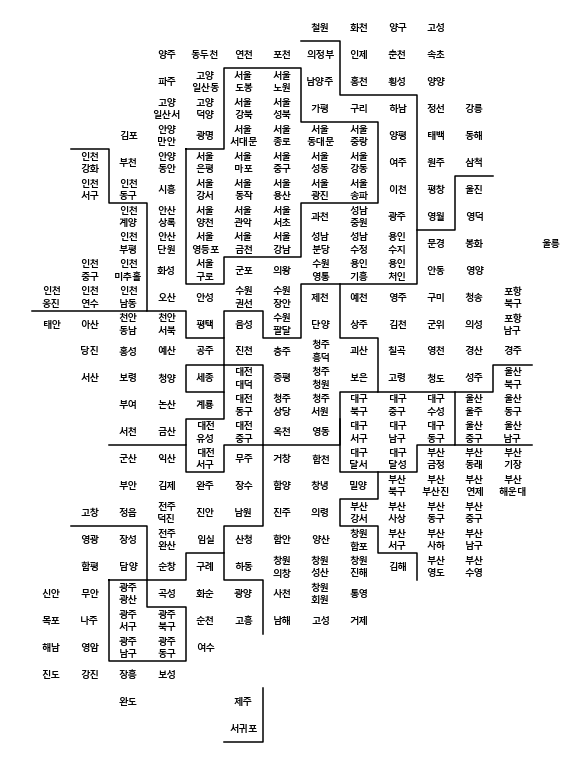

In [1668]:

plt.figure(figsize=(8,11))
for idx, row in draw_korea.iterrows():
    if len(row['ID'].split()) == 2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5,1.5
    else:
        fontsize, linespacing = 9.5,1.5
    plt.annotate(dispname,(row['x']+0.5, row['y']+0.5),weight='bold',
                fontsize=fontsize,ha='center',va='center',
                linespacing=linespacing)
for path in border_lines:
    ys, xs = zip(*path)
    # print(ys, xs)
    plt.plot(xs,ys,c='black',lw=1.5)

plt.gca().invert_yaxis()
plt.axis('off')

plt.tight_layout()
plt.show()

In [1669]:
pop['ID']

0          강릉
1      고성(강원)
2          동해
3          삼척
4          속초
        ...  
256     청주 서원
257     청주 청원
258     청주 흥덕
259     청주 소계
260        충주
Name: ID, Length: 261, dtype: object

## 없는 정보 지우기

In [1673]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))
for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID']==tmp].index)
print(tmp_list)

['수원 소계', '청주 소계', '천안 소계', '전주 소계', '포항 소계', '용인 소계', '창원 소계', '안양 소계', '고양 소계', '성남 소계', '안산 소계']


In [1672]:
draw_korea['ID'].unique()

array(['철원', '화천', '양구', '고성(강원)', '양주', '동두천', '연천', '포천', '의정부', '인제',
       '춘천', '속초', '파주', '고양 일산동', '서울 도봉', '서울 노원', '남양주', '홍천', '횡성',
       '양양', '고양 일산서', '고양 덕양', '서울 강북', '서울 성북', '가평', '구리', '하남', '정선',
       '강릉', '김포', '안양 만안', '광명', '서울 서대문', '서울 종로', '서울 동대문', '서울 중랑',
       '양평', '태백', '동해', '인천 강화', '부천', '안양 동안', '서울 은평', '서울 마포',
       '서울 중구', '서울 성동', '서울 강동', '여주', '원주', '삼척', '인천 서구', '인천 동구',
       '시흥', '서울 강서', '서울 동작', '서울 용산', '서울 광진', '서울 송파', '이천', '평창',
       '울진', '인천 계양', '안산 상록', '서울 양천', '서울 관악', '서울 서초', '과천', '성남 중원',
       '광주', '영월', '영덕', '인천 부평', '안산 단원', '서울 영등포', '서울 금천', '서울 강남',
       '성남 분당', '성남 수정', '용인 수지', '문경', '봉화', '울릉', '인천 중구', '인천 미추홀',
       '화성', '서울 구로', '군포', '의왕', '수원 영통', '용인 기흥', '용인 처인', '안동', '영양',
       '인천 옹진', '인천 연수', '인천 남동', '오산', '안성', '수원 권선', '수원 장안', '제천',
       '예천', '영주', '구미', '청송', '포항 북구', '태안', '아산', '천안 동남', '천안 서북',
       '평택', '음성', '수원 팔달', '단양', '상주', '김천', '군위', '의성', '포항 남구', '당진',
 

In [1674]:
pop.head()

,광역시도,시군구,행정구,20~39세합계,20~39세여자,65세 이상합계,인구수합계,인구수남자,인구수여자,소멸비율,소멸위기지역,ID
0,강원,강릉시,,46008,20993,40497,203057,101154,101903,1.036768,False,강릉
1,강원,고성군,,4006,1699,7005,23621,11933,11688,0.485082,True,고성(강원)
2,강원,동해시,,16311,7510,16152,83888,42093,41795,0.929916,True,동해
3,강원,삼척시,,12428,5280,14953,61833,31630,30203,0.706213,True,삼척
4,강원,속초시,,15928,7411,14010,76302,37488,38814,1.057959,False,속초


In [1676]:
pop = pd.merge(pop, draw_korea, how='left', on='ID')
pop.head()

,광역시도,시군구,행정구,20~39세합계,20~39세여자,65세 이상합계,인구수합계,인구수남자,인구수여자,소멸비율,소멸위기지역,ID,y,x
0,강원,강릉시,,46008,20993,40497,203057,101154,101903,1.036768,False,강릉,3,11
1,강원,고성군,,4006,1699,7005,23621,11933,11688,0.485082,True,고성(강원),0,10
2,강원,동해시,,16311,7510,16152,83888,42093,41795,0.929916,True,동해,4,11
3,강원,삼척시,,12428,5280,14953,61833,31630,30203,0.706213,True,삼척,5,11
4,강원,속초시,,15928,7411,14010,76302,37488,38814,1.057959,False,속초,1,10


In [1677]:
pop[pop['x'].isnull()]

,광역시도,시군구,행정구,20~39세합계,20~39세여자,65세 이상합계,인구수합계,인구수남자,인구수여자,소멸비율,소멸위기지역,ID,y,x


In [1678]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = .75
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData]))*0.25 + min(blockedMap[targetData])
    datalabel = targetData
    
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    
    mapdata = blockedMap.pivot_table(index='y', columns = 'x', values = targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize = (6, 8))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)
    
    for idx, row in blockedMap.iterrows():
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] =='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 8, 1.1
        else:
            fontsize, linespacing = 9, 0.9
            
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', fontsize= fontsize, ha='center', va='center', linespacing=linespacing)
        
    for path in border_lines:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)
    
    plt.gca().invert_yaxis()
    plt.axis('off')
    cb =plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)
    
    plt.tight_layout()
    plt.show()

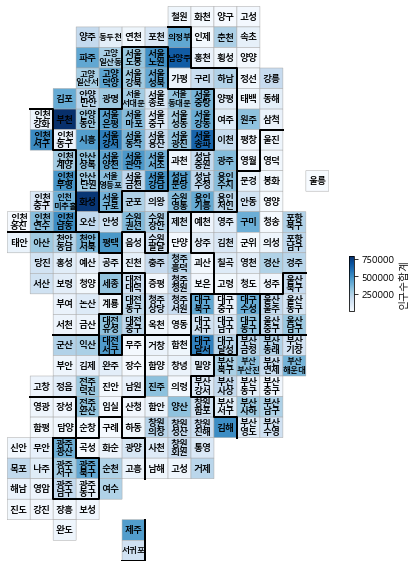

In [1679]:
drawKorea('인구수합계', pop, 'Blues')

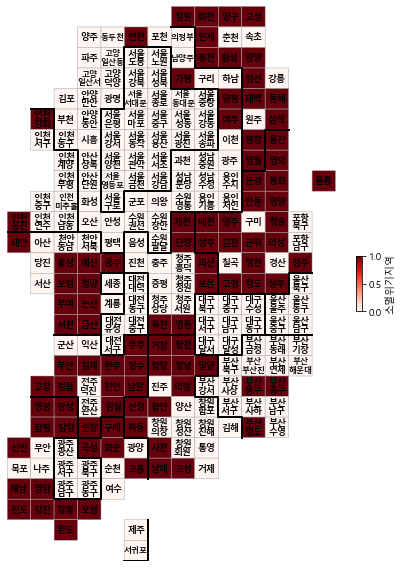

In [1680]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

In [1681]:
def drawKorea2(targetData, blockedMap, cmapname):
    gamma = .75
    whitelabelmin = 20.
    datalabel = targetData
    
    tmp_max = max([np.abs(min(blockedMap[targetData])), np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max
        
    mapdata = blockedMap.pivot_table(index='y', columns = 'x', values = targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize = (6, 8))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)
    
    for idx, row in blockedMap.iterrows():
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] =='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 8, 1.1
        else:
            fontsize, linespacing = 9, 0.9
            
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', fontsize= fontsize, ha='center', va='center', color=annocolor, linespacing=linespacing)
        
    for path in border_lines:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)
    
    plt.gca().invert_yaxis()
    plt.axis('off')
    cb =plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)
    
    plt.tight_layout()
    plt.show()

In [1682]:
pop['여성비']= (pop['인구수여자']/pop['인구수합계'] -0.5) * 100

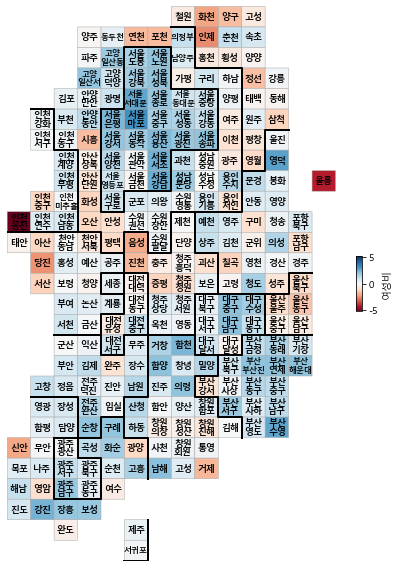

In [1683]:
drawKorea2('여성비', pop, 'RdBu')

In [1684]:
pop['2030여성비'] = (pop['20~39세여자']/pop['20~39세합계']-0.5)*100

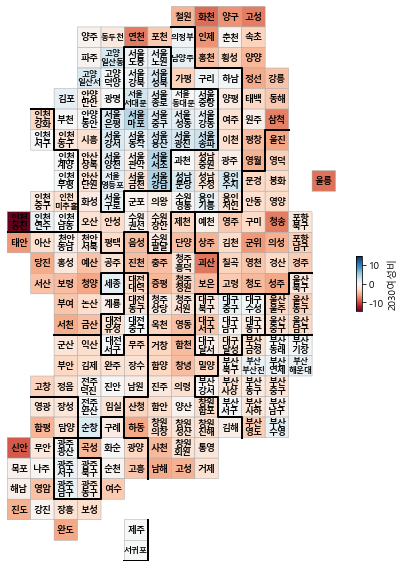

In [1685]:
drawKorea2('2030여성비', pop, 'RdBu')

In [1707]:
pop_folium = pop.set_index('ID')
pop_folium.columns

Index(['광역시도', '시군구', '행정구', '20~39세합계', '20~39세여자', '65세 이상합계', '인구수합계',
       '인구수남자', '인구수여자', '소멸비율', '소멸위기지역', 'y', 'x', '여성비', '2030여성비'],
      dtype='object')

In [1718]:
pop_folium[pop_folium['시군구']=='부천시']['시군구']

ID
부천    부천시
Name: 시군구, dtype: object

## Folium 그리기

In [1688]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1730]:
geo_path = './data/05. skorea_municipalities_geo_simple_수정.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))
map =folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data=geo_data,
              data= pop_folium['인구수합계'],
              columns=[pop_folium.index, pop_folium['인구수합계']],
              fill_color='YlGnBu',
              key_on='feature.id')
title_html = '''
             <h3 align="center" style="font-size:20px"><b>인구수</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))
map

In [1731]:
map =folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data=geo_data,
              data= pop_folium['소멸위기지역'],
              columns = [pop_folium.index, pop_folium['소멸위기지역']],
              fill_color='PuRd',
              key_on='feature.id')
title_html = '''
             <h3 align="center" style="font-size:20px"><b>소멸위기지역</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))
map